# Note: This lab was part of my MSc Artificial Intelligence course
# Lab 3. Genetic Algorithms
# Task 3.3 The Map Colouring Problem
## Problem Description:
The Map Colouring Problem is a classic constraint satisfaction problem (CSP) where the goal is to assign colours to regions on a map in such a way that:

- No two neighbouring regions share the same colour.
- The total number of colours used should typically be minimised (though in this task, we are limited to four colours).

### Rules of the Problem
Each region on the map must be assigned one colour.
Two regions that are adjacent (share a border) must not have the same colour.
The solution must adhere to the Four Colour Theorem, which states that any 2D map can be coloured using a maximum of four colours such that no two neighbouring regions share the same colour.


##To solve the problem using a genetic algorithm (GA):

###Encoding Scheme:

Represent the solution as a list where each position corresponds to a region, and the value at each position represents its colour (e.g., [0, 1, 2, 3] for 4 colours).

Example: [1, 2, 0, 1] could represent the colours assigned to 4 regions.

###Fitness Function:
The fitness function counts the number of neighbouring regions that share the same colour.
A valid solution has a fitness of 0, meaning no two neighbours have the same colour.

###Genetic Operators:
Selection: Tournament selection to choose better solutions for reproduction.

Crossover: Combines parts of two parent solutions while preserving valid colour assignments.

Mutation: Randomly changes the colour of a region to explore new possibilities.

###Real-World Application:
The Map Colouring Problem is not just a theoretical puzzle; it has practical uses in:

Geographical mapping: Assigning colours to countries or states on a map.

Scheduling problems: Assigning time slots or resources where conflicts must be avoided.

## Implementation and Results
###Optimal Solution:
The genetic algorithm found a valid solution: [3, 1, 0, 3, 0, 0, 2, 1, 2, 3, 1], where:

Colours: 0 = Red, 1 = Green, 2 = Blue, 3 = Gray.

Example: Mark = Gray, Julia = Green, Steve = Red, etc.

###Fitness:
The fitness value is 0, meaning no neighbouring regions share the same colour, satisfying all problem constraints.

###Key Insights:
The algorithm successfully applied the Four Colour Theorem, using 4 colours efficiently.

This approach is applicable to real-world problems like scheduling or resource allocation where conflicts must be avoided.

In [8]:
!pip install deap
import array
import random
import numpy as np
from deap import creator, base, tools, algorithms
!pip install matplotlib networkx
import matplotlib.pyplot as plt
import networkx as nx

In [9]:
# Specify the variables
numColour = 4
numNames = 11
colours = ('red', 'green', 'blue', 'gray')
names = ('Mark', 'Julia', 'Steve', 'Amanda', 'Brian',
         'Joanne', 'Derek', 'Allan', 'Michelle', 'Kelly', 'Chris')

# Define the neighbours
neighbours =  [ [0,1,1,0,0,0,0,0,0,0,0],
                [0,0,1,1,1,0,1,0,0,0,0],
                [0,0,0,1,0,0,0,1,1,0,0],
                [0,0,0,0,0,1,1,0,1,0,0],
                [0,0,0,0,0,0,1,0,0,1,0],
                [0,0,0,0,0,0,1,0,1,1,1],
                [0,0,0,0,0,0,0,0,0,1,1],
                [0,0,0,0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,0,0,0,0]]


In [10]:
def evalMapColouring(ind):
    val = 0
    for i in range(0, numNames):
      for j in range(0, numNames):
        if (neighbours[i][j] == 1) and (ind[i] == ind[j]):
            val += 1
    return val,

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_colour", random.randint, 0, numColour-1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_colour, numNames)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evalMapColouring)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=numColour-1, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [15]:
# Run the genetic algorithm
pop = toolbox.population(n=10)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.8, mutpb=0.4, ngen=100,
                              stats=stats, verbose=True)

best = tools.selBest(pop, 1)[0]
print("Best: %s. Fitness: %s." %(best.tolist(), evalMapColouring(best)[0]))
for i in range(numNames):
  print("%s ==> %s" %(names[i], colours[best[i]]))

gen	nevals	min
0  	10    	3  
1  	10    	3  
2  	10    	3  
3  	10    	3  
4  	9     	2  
5  	10    	2  
6  	9     	2  
7  	7     	2  
8  	10    	2  
9  	10    	2  
10 	9     	2  
11 	9     	2  
12 	10    	2  
13 	9     	1  
14 	8     	1  
15 	9     	1  
16 	8     	1  
17 	10    	1  
18 	6     	1  
19 	8     	1  
20 	8     	1  
21 	6     	1  
22 	7     	1  
23 	8     	1  
24 	10    	1  
25 	9     	1  
26 	6     	1  
27 	9     	1  
28 	9     	1  
29 	10    	1  
30 	10    	1  
31 	9     	1  
32 	8     	1  
33 	8     	1  
34 	8     	1  
35 	8     	1  
36 	10    	1  
37 	10    	1  
38 	6     	1  
39 	10    	1  
40 	9     	1  
41 	10    	1  
42 	9     	1  
43 	10    	1  
44 	10    	1  
45 	9     	1  
46 	9     	1  
47 	8     	1  
48 	8     	1  
49 	10    	0  
50 	10    	0  
51 	10    	0  
52 	10    	0  
53 	10    	0  
54 	10    	0  
55 	10    	0  
56 	10    	0  
57 	10    	0  
58 	10    	0  
59 	4     	0  
60 	10    	0  
61 	10    	0  
62 	10    	0  
63 	10    	0  
64 	9     	0  
65 	8     

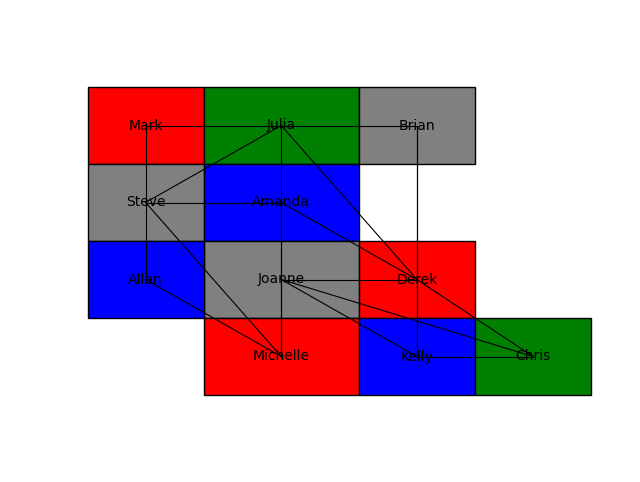

In [16]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def draw_map(names, neighbours, colours, best_solution):
    # Define polygons for each region with coordinates
    region_shapes = {
        'Mark': [(1, 8), (2.5, 8), (2.5, 7), (1, 7)],
        'Julia': [(2.5, 8), (4.5, 8), (4.5, 7), (2.5, 7)],
        'Steve': [(1, 7), (2.5, 7), (2.5, 6), (1, 6)],
        'Amanda': [(2.5, 7), (4.5, 7), (4.5, 6), (2.5, 6)],
        'Brian': [(4.5, 8), (6, 8), (6, 7), (4.5, 7)],
        'Joanne': [(2.5, 6), (4.5, 6), (4.5, 5), (2.5, 5)],
        'Derek': [(4.5, 6), (6, 6), (6, 5), (4.5, 5)],
        'Allan': [(1, 6), (2.5, 6), (2.5, 5), (1, 5)],
        'Michelle': [(2.5, 5), (4.5, 5), (4.5, 4), (2.5, 4)],
        'Kelly': [(4.5, 5), (6, 5), (6, 4), (4.5, 4)],
        'Chris': [(6, 5), (7.5, 5), (7.5, 4), (6, 4)],
    }

    fig, ax = plt.subplots(figsize=(8, 6))

    # Draw each region as a polygon
    for i, name in enumerate(names):
        shape_coords = region_shapes[name]
        region_color = colours[best_solution[i]]
        polygon = Polygon(shape_coords, closed=True, edgecolor="black", facecolor=region_color)
        ax.add_patch(polygon)

        # Add the name of the region in the center of the polygon
        centroid_x = sum([coord[0] for coord in shape_coords]) / len(shape_coords)
        centroid_y = sum([coord[1] for coord in shape_coords]) / len(shape_coords)
        ax.text(centroid_x, centroid_y, name, ha='center', va='center', fontsize=10, color='black')

    # Draw edges for neighbouring regions
    for i in range(len(neighbours)):
        for j in range(len(neighbours[i])):
            if neighbours[i][j] == 1:
                pos1 = region_shapes[names[i]]
                pos2 = region_shapes[names[j]]
                # Draw a line connecting the centroids of neighbouring regions
                centroid1 = (sum([p[0] for p in pos1]) / len(pos1), sum([p[1] for p in pos1]) / len(pos1))
                centroid2 = (sum([p[0] for p in pos2]) / len(pos2), sum([p[1] for p in pos2]) / len(pos2))
                ax.plot([centroid1[0], centroid2[0]], [centroid1[1], centroid2[1]], color="black", linewidth=0.8)

    # Final adjustments to make the plot look clean
    ax.set_xlim(0, 8)
    ax.set_ylim(3, 9)
    ax.axis('off')
    plt.show()

# Call the function with your best solution
draw_map(names, neighbours, colours, best)


## Discussions

###Efficiency of the Genetic Algorithm:
The algorithm successfully adhered to the Four Colour Theorem, proving that genetic algorithms can efficiently solve constraint satisfaction problems. The encoding scheme and fitness function were simple yet effective in ensuring valid colour assignments for all regions.


###Scalability and Practical Applications:
While this task used 11 regions and 4 colours, the approach can scale to larger maps or even real-world problems, such as scheduling and resource allocation. However, larger maps might require a higher population size and more generations to explore the solution space effectively.


###Balancing Exploration and Exploitation:
The combination of selection, crossover, and mutation allowed the algorithm to balance exploring new solutions (via mutation) and refining existing ones (via crossover). This is crucial in avoiding local optima and finding globally valid solutions, especially for complex maps with many neighbouring constraints.